<a href="https://colab.research.google.com/github/lutherleo/Quantum-Computing/blob/main/Qbit_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter first number between 1 and 7: 7
Enter second number between 1 and 7: 7


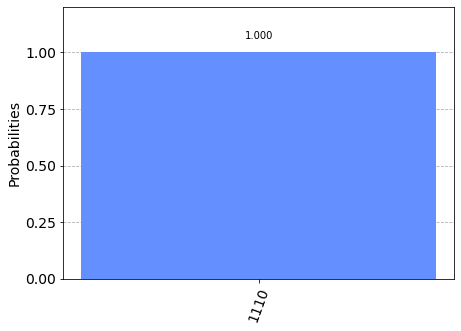

In [ ]:
pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src
import qiskit
qiskit.__qiskit_version__
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *



a = input("Enter first number between 1 and 7: ")
b = input("Enter second number between 1 and 7: ")

c = decimalToBinary(int(a))
d = decimalToBinary(int(b))

lis_c = list(str(c))
lis_d = list(str(d))
rev_c = lis_c[::-1]
rev_d = lis_d[::-1]

qc_calc = QuantumCircuit(12,4)


for i in range(0,len(rev_c)):
  if(int(rev_c[i]) == 1):
    qc_calc.x(int(i))

for j in range(0,len(rev_d)) :
  if(int(rev_d[j]) == 1):
    qc_calc.x(3+ int(j)) 

qc_calc.barrier()
for i in range(0,3):
  qc_calc.cx(int(i),9-int(i))
  qc_calc.cx(3+int(i), 9 - int(i))

qc_calc.barrier()

qc_calc.ccx(0,3,8)
qc_calc.ccx(1,4,7)
qc_calc.ccx(2,5,6)
qc_calc.barrier()

qc_calc.barrier()

qc_calc.measure(9,0)
qc_calc.measure(8,1)
qc_calc.measure(7,2)
qc_calc.measure(6,3)

qc_calc.draw()

qobj = assemble(qc_calc)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)
#print(lis_c[::-1])